# 

# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [1]:
# only library allowed do not modify
from src.sql import execute_query

In [10]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM train_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,7484,9996,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,train
1,1,3593,2338,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,train
2,2,12246,5091,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,train
3,3,5237,10266,None,16-03-2020,My food stock is not the only one which is emp...,Positive,train
4,4,14067,3014,None,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,train
...,...,...,...,...,...,...,...,...
41152,41152,10280,14781,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,train
41153,41153,10605,1158,None,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,train
41154,41154,4884,1029,None,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,train
41155,41155,9052,7736,None,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,train


In [ ]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [50]:
# write query inside docstring
query_1 = """
        SELECT UserName, Location, count(*) count FROM train_table GROUP BY UserName, Location ORDER BY count(*) DESC LIMIT 10
"""

In [51]:
result_1 = execute_query(query_1)

In [52]:
result_1

,UserName,Location,count
0,2757,None,5
1,7758,None,5
2,9382,None,5
3,113,None,4
4,463,None,4
5,633,None,4
6,711,None,4
7,713,None,4
8,1401,None,4
9,1816,None,4


## Question 2: Intermediate SQL


In [8]:
# write query inside docstring
query_2 = """
SELECT 
        UserName, 
        COUNT(CASE Sentiment WHEN 'Positive' THEN 1 ELSE NULL END) pos_count,
        COUNT(CASE Sentiment WHEN 'Negative' THEN 1 ELSE NULL END) neg_count,
        COUNT(CASE Sentiment WHEN 'Extremely Positive' THEN 1 ELSE NULL END) extremely_pos_count,
        COUNT(CASE Sentiment WHEN 'Extremely Negative' THEN 1 ELSE NULL END) extremely_neg_count
FROM
    train_table
GROUP BY
    UserName
        
"""

In [9]:
result_2 = execute_query(query_2)

In [10]:
result_2

,UserName,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,0,1,0,0,0
1,1,2,0,2,0
2,2,0,1,0,0
3,3,1,0,0,1
4,4,1,0,1,0
...,...,...,...,...,...
13994,14978,0,0,0,1
13995,14979,1,0,2,0
13996,14980,2,0,0,0
13997,14981,2,0,0,0


## Question 3: Medium SQL

In [2]:
# write query inside docstring
query_3 = """
SELECT
    tweetAt,
    COUNT(CASE WHEN Sentiment IN ('Positive', 'Extremely Positive') THEN 1 ELSE NULL END) / 
    ((COUNT(CASE WHEN Sentiment IN ('Negative', 'Extremely Negative') THEN 1 ELSE NULL END) +
    COUNT(CASE WHEN Sentiment IN ('Positive', 'Extremely Positive') THEN 1 ELSE NULL END))*1.0) pos_rate
FROM
    train_table
GROUP BY
    tweetAt
ORDER BY
    COUNT(CASE WHEN Sentiment IN ('Positive', 'Extremely Positive') THEN 1 ELSE NULL END) / 
    ((COUNT(CASE WHEN Sentiment IN ('Negative', 'Extremely Negative') THEN 1 ELSE NULL END) +
    COUNT(CASE WHEN Sentiment IN ('Positive', 'Extremely Positive') THEN 1 ELSE NULL END))*1.0)
    DESC
"""

In [3]:
result_3 = execute_query(query_3)

In [4]:
result_3

,TweetAt,pos_rate
0,28-03-2020,0.772727
1,29-03-2020,0.670103
2,09-04-2020,0.605396
3,10-04-2020,0.592689
4,08-04-2020,0.589050
5,11-04-2020,0.585970
6,25-03-2020,0.582892
7,05-04-2020,0.573661
8,04-04-2020,0.566719
9,23-03-2020,0.565348


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

In [53]:
import pandas as pd
def plot(df : pd.DataFrame, titulo):
    #TODO: YOUR CODE GOES HERE
    df[df.columns[0]]= pd.to_datetime(df[df.columns[0]], infer_datetime_format=True)
    df.set_index(df.columns[0])[df.columns[1]].resample('d').mean().plot.line(title=titulo, marker='.');

SyntaxError: invalid syntax (839818973.py, line 5)

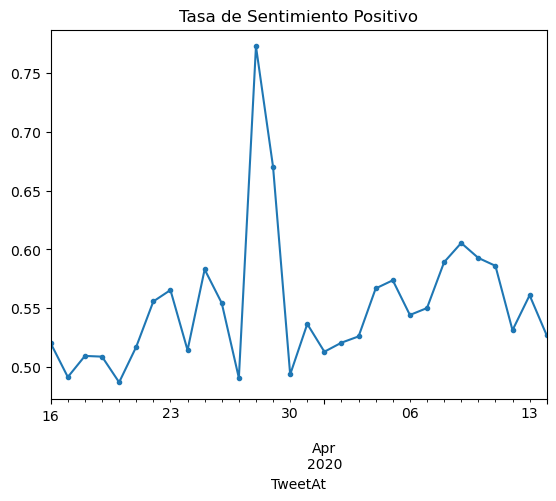

In [54]:
plot(result_3, 'Tasa de Sentimiento Positivo')

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5

In [4]:
import csv


class Data:
    def __init__(self, datacsv):
        # CODE GOES HERE
        self.datacsv = datacsv
        pass


    def infer_dtypes(self):
        # CODE GOES HERE
        dict={}
        for i in self:
            dict[i]=[]
            for j in d[i]:
                dict[i].append(float(j))

        
        """ Example return
                {
                    "col1": int,
                    "col2": float,
                    "col3": date
                }

        """  
        return  self.dtypes.to_dict()



class DataReader:
    def __init__(self, filepath : str):
        # CODE GOES HERE
        self.filepath = filepath
        pass
    
    def read_csv(self):
        f = open(self, 'r', encoding='utf-8-sig')
        reader = csv.reader(f, delimiter=',', quotechar='\'')
        headers = next(reader, None)
        
        column = {}
        for h in headers:
            column[h] = []
        
        
        for row in reader:
            for h, v in zip(headers, row):
                column[h].append(v)
        return column
    





In [5]:
from datetime import datetime as dt
fcsv = DataReader.read_csv('data\malformed_dataset.csv')



d1=dict.fromkeys(fcsv,"c")



'''
borrar_linea = []

for row in range(len(fcsv['DateTime'])):
    try:
        fcsv['DateTime'][row]=str((dt.strptime(fcsv['DateTime'][row], '%m/%d/%Y %H:%M')))
    except:
        borrar_linea.append(row)


for key in fcsv:
    del fcsv['DateTime']
    del fcsv['Humidity']
    del fcsv['Temperature']
    del fcsv['Temperature_range (low)']
    del fcsv['Temperature_range (high)']
'''


print(fcsv)



{'DateTime': ['10/9/2016 0:00', '10/10/2016 0:00', '10/11/2016 0:00', '10/12/2016 0:00', '10/13/2016 0:00', '10/14/2016 0:00', '10/15/2016 0:00', '10/16/2016 0:00', '10/17/2016 0:00', '10/18/2016 0:00', '10/19/2016 0:00', '10/20/2016 0:00', '10/21/2016 0:00', '10/22/2016 0:00', '10/23/2016 0:00', '10/24/2016 0:00', '10/25/2016 0:00', '10/26/2016 0:00', '10/27/2016 0:00', '10/28/2016 0:00', '10/29/2016 0:00', '10/30/2016 0:00', '10/31/2016 0:00', '11/1/2016 0:00', '11/2/2016 0:00', '11/3/2016 0:00', '', '11/5/2016 0:00', '11/6/2016 0:00', '11/7/2016 0:00', '11/8/2016 0:00', '11/9/2016 0:00', '11/10/2016 0:00', '11/11/2016 0:00', '', '11/13/2016 0:00', '11/14/2016 0:00', '11/15/2016 0:00', '11/16/2016 0:00', '11/17/2016 0:00', '11/18/2016 0:00', '11/19/2016 0:00', '11/20/2016 0:00', '11/21/2016 0:00', '', '11/23/2016 0:00', '11/24/2016 0:00', '', '11/26/2016 0:00', '11/27/2016 0:00', '11/28/2016 0:00', '11/29/2016 0:00', '11/30/2016 0:00', '12/1/2016 0:00', '12/2/2016 0:00', '12/3/2016 0